In [16]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
%pip uninstall clearml
%pip uninstall wandb

Found existing installation: wandb 0.19.6
Uninstalling wandb-0.19.6:
  Would remove:
    /usr/local/bin/wandb
    /usr/local/bin/wb
    /usr/local/lib/python3.11/dist-packages/package_readme.md
    /usr/local/lib/python3.11/dist-packages/wandb-0.19.6.dist-info/*
    /usr/local/lib/python3.11/dist-packages/wandb/*
Proceed (Y/n)? Y
  Successfully uninstalled wandb-0.19.6


In [3]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [4]:
# Import from GitHub in Colab

if os.getenv("COLAB_RELEASE_TAG"):
   print("Running in Colab")
   !npx degit xldrkp/autodistill-example -f

Running in Colab
⠙⠹⠸⠼⠴⠦Need to install the following packages:
degit@2.8.4
Ok to proceed? (y) y

⠙⠹⠸⠼> destination directory is not empty. Using --force, continuing
> cloned xldrkp/autodistill-example#HEAD
⠙

In [ ]:
%pip install autodistill autodistill-grounded-sam autodistill-yolov8 roboflow scikit-learn autodistill-grounding-dino ultralytics

In [ ]:
%pip install supervision

In [17]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [19]:
IMAGE_DIR_PATH = f"{HOME}/images"

## Anzeigen von Beispielbildern

In [20]:
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

image count: 1114


In [21]:
IMAGE_DIR_PATH = f"{HOME}/images"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 10)

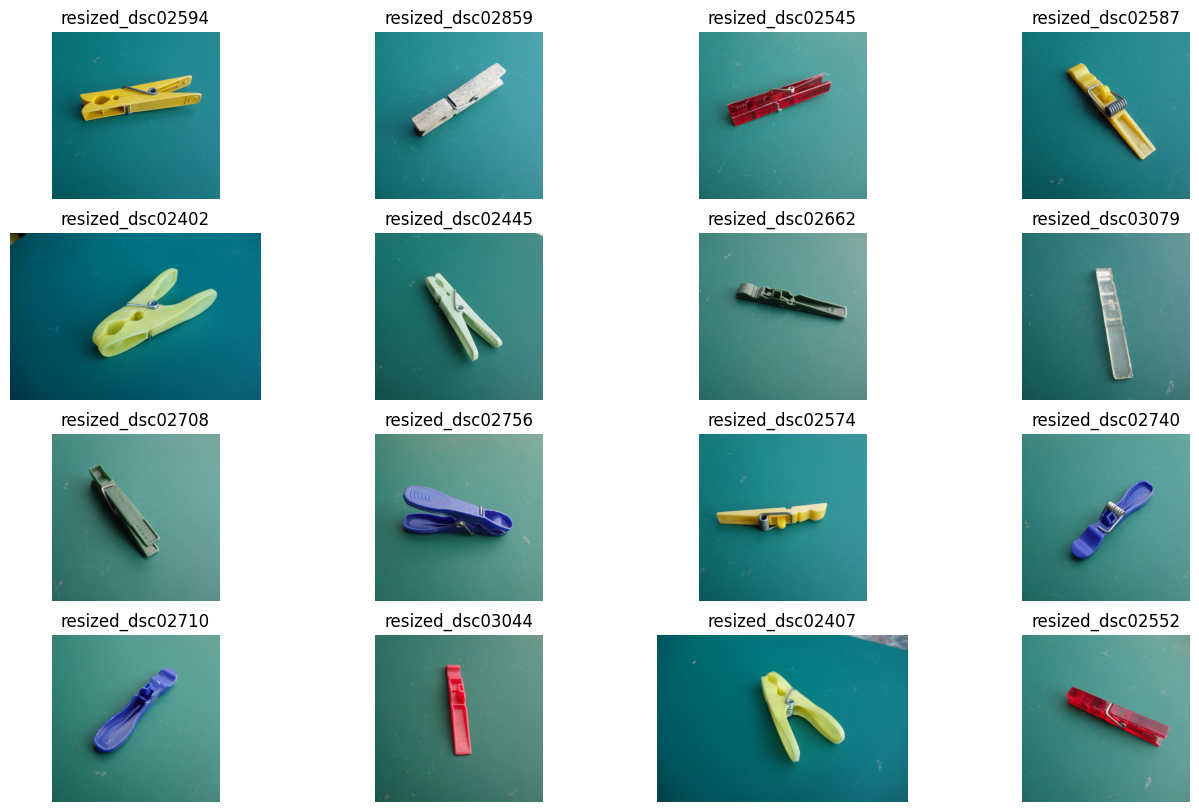

In [22]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

## Automatisches Labeln

### Eine Ontologie definieren

In [23]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology(    {
        "clothes pin": "OK",
        "broken clothes pin with torsion spiral": "NOK_spiral",
        "broken clothes pin without torsion spiral": "NOK_nospiral"
    })

Ein Ort für das gelabelte Datenset vorbereiten:

In [24]:
DATASET_DIR_PATH = f"{HOME}/dataset"

In [26]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

In [ ]:
target_model = YOLOv8("yolov8n.pt")
target_model.train("./labeled-images/data.yaml", epochs=200)

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.11.11 to